<a href="https://colab.research.google.com/github/alexsuakim/Computer-Vision/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip uninstall opencv-python-headless

In [ ]:
#!pip install opencv-python

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np
from skimage.io import imread
from skimage.io import imshow #pip install scikit-image
import pandas as pd

**Consider the first two images in each row below. Suggest a method based on arithmetic and logic operations to get the rightmost image. Write the code to validate your thoughts.**

For first row,

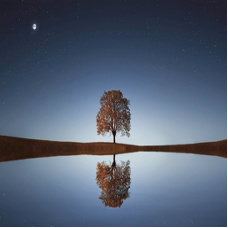

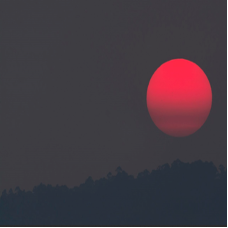

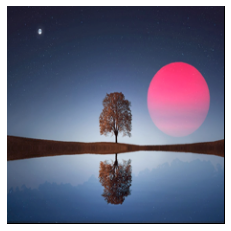

In [ ]:
#your code starts here

#read the input images
img1 = cv2.imread("./q1_1.png")
img2 = cv2.imread("./q1_2.png")
x,y,c=np.shape(img1)

#check if they have the same shape
if (img1.shape == img2.shape):

    #typecast to float32
    img1 = np.float32(img1)
    img2 = np.float32(img2)

    #addition
    add = img1 + img2

    #adjust brightness
    diff = np.mean(img2)
    adj = add - diff

    #filter out the values out of range
    for i in range (x ):
        for j in range (y):
            for k in range (c):
                if (adj[i][j][k] >255):
                    adj[i][j][k] = 255
                elif (adj[i][j][k] <0):
                    adj[i][j][k] = 0

    #typecast back to int
    adj.astype(int)

    #show image
    RGB_adj = cv2.cvtColor(adj, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_adj.astype('uint8'))
    plt.axis("off")

#your code should end here

For the second row,

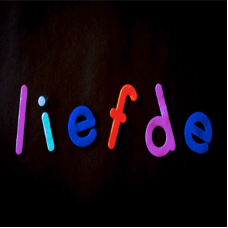

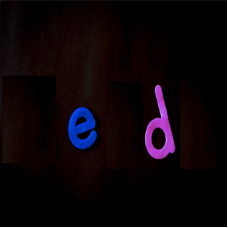

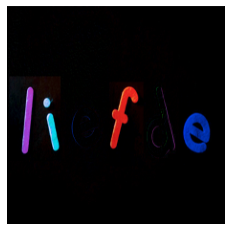

In [ ]:
#Your code starts here

#read the input images
img4 = cv2.imread("./q1_4.png")
img5 = cv2.imread("./q1_5.png")
x,y,c=np.shape(img4)

#check if they have the same shape
if (img4.shape == img5.shape):

    #typecast to float32
    img4 = np.float32(img4)
    img5 = np.float32(img5)

    #preprocess by shifting
    for i in range (x-2):
                img5[i] = img5[i+2]

    #subtract
    sub = img4 - img5

    #filter out the values out of range
    for i in range (x ):
        for j in range (y):
            for k in range (c):
                if (sub[i][j][k] < 0):
                    sub[i][j][k] = 0

    #typecast back to int
    sub.astype(int)

    #show image
    RGB_sub = cv2.cvtColor(sub, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_sub.astype('uint8'))
    plt.axis("off")

#Your code should end here

**Histogram Equalization**

(1) Write the code to show the histogram of the following image

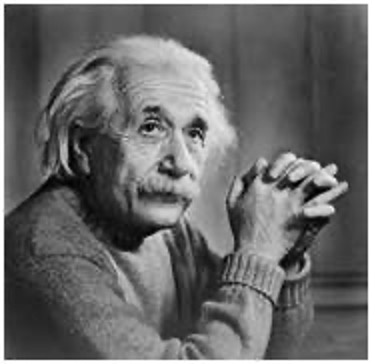

(2) CDFs for 8 intervals are:
level 0: 0.03
level 1: 0.25
level 2: 0.54
level 3: 0.72
level 4: 0.83
level 5: 0.92
level 6: 0.96
level 7: 1.0

(3) New Grey Levels
level 0: 0
level 1: 2
level 2: 4
level 3: 5
level 4: 6
level 5: 6
level 6: 7
level 7: 7


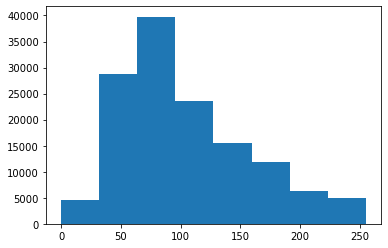

In [ ]:
#Your code starts here

#read image q2 as a matrix
einstein = cv2.imread("./q2.jpg")
x,y,c=np.shape(einstein)

#(1) plot original histogram with 8 columns
plt.hist(einstein[:,:,0].ravel(), bins=8);

#(2)
#compute PDF by counting
count = [0] * 8
for i in range (x):
    for j in range (y):
        level = int((einstein[i,j,0]) / 32)
        count[level] += 1

#compute CDF
cdf_value = 0
cdf = [0] * 8
print("(2) CDFs for 8 intervals are:")
for i in range (8):
    cdf_value += count[i] / (x * y)
    cdf[i] = cdf_value
    print(f"level {i}: {round(cdf[i], 2)}")

#(3) compute new grey level
print("\n(3) New Grey Levels")
new_grey_level = [0] * 8
for i in range (8):
    new_grey_level[i] = round(cdf[i] * 7)
    print(f"level {i}: {new_grey_level[i]}")

#Your code should end here

(4) Apply Histogram Equalization to the original image and visualize the resulting image and its histogram.

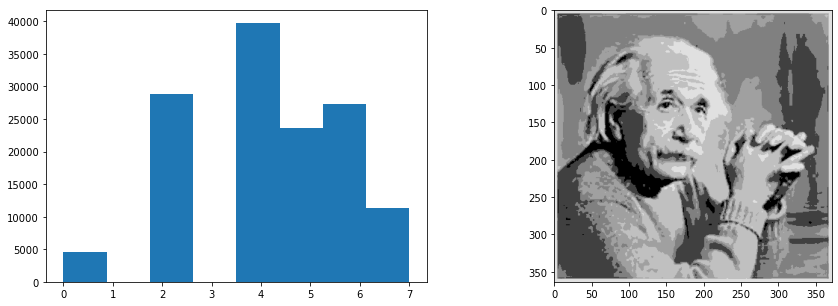

In [ ]:
#Your code starts here

#shape of image
x,y,c=np.shape(einstein)

#plot side by side
fig, axes = plt.subplots(1,2, figsize=(15, 5))

#(4) plot new histogram
img_list = einstein[:,:,0].flatten()
img_ngl = img_list
for i in range (x * y):
    grey_level = int(img_list[i] / 32)
    img_ngl[i] = new_grey_level[grey_level]
axes[0].hist(img_ngl, bins=8);

#(4) cont. new image
img_ngl *= 32
img_ngl.shape = (x,y)
RGB_img_ngl = cv2.cvtColor(img_ngl, cv2.COLOR_BGR2RGB);
axes[1].imshow(RGB_img_ngl)

#Your code should end here

** Fourier Transforms**

(1)






[ 0.        +0.j          0.07612047-0.38268343j -0.29289322+0.70710678j
  0.61731657-0.92387953j -1.        +1.j          1.38268343-0.92387953j
 -1.70710678+0.70710678j  1.92387953-0.38268343j -2.        +0.j
  1.92387953+0.38268343j -1.70710678-0.70710678j  1.38268343+0.92387953j
 -1.        -1.j          0.61731657+0.92387953j -0.29289322-0.70710678j
  0.07612047+0.38268343j]


C:\Users\Sua\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


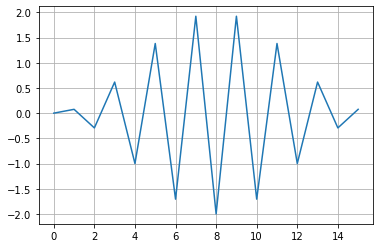

In [ ]:
#Your code starts here

#manual calculation:
# F(u) = cos(πuN) - i*sin(πuN) - cos(πu(N+1)) + i*sin(πu(N+1))

#python code
#let N=16.
signal = np.array([0, 0, 0, 0, 0, 0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0])
f = np.fft.fft(signal)
print(f)
plt.plot(f)
plt.grid()

#fig, ax = plt.subplots(figsize=(12,8))
#for i in range(len(signal)):
  #ax.text(f[:],f, size=16)

#Your code should end here

(2)

[ 2.        +0.j         -2.14065228-0.05826008j  2.41421356+0.41421356j
 -2.47247365-1.14065228j  2.        +2.j         -0.94173992-2.55486585j
 -0.41421356+2.41421356j  1.55486585-1.47247365j -2.        +0.j
  1.55486585+1.47247365j -0.41421356-2.41421356j -0.94173992+2.55486585j
  2.        -2.j         -2.47247365+1.14065228j  2.41421356-0.41421356j
 -2.14065228+0.05826008j]


C:\Users\Sua\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


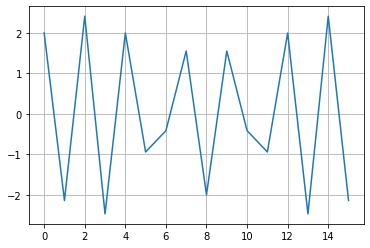

In [ ]:
#Your code starts here

#manual calculation:
# F(u) = 1/N * [2{cos(πuN) - i*sin(πuN)} - {cos(πu(N-2)) - i*sin(πu(N-2))} - {cos(πu(N+2)) - i*sin(πu(N+2))}]

#python code
#let N=16.
signal = np.array([0, 0, 0, 0, 0, 0, -1, 2, 1, 0, 0, 0, 0, 0, 0, 0])
f = np.fft.fft(signal)
print(f)
plt.plot(f)
plt.grid()

#Your code should end here

(3)

[ 5.        +0.j         -3.93754928-1.63098631j  1.70710678+1.70710678j
 -0.13438055-0.32442335j  0.        -1.j         -0.45140589+1.08979021j
  0.29289322-0.29289322j  0.52333572-0.21677275j -1.        +0.j
  0.52333572+0.21677275j  0.29289322+0.29289322j -0.45140589-1.08979021j
  0.        +1.j         -0.13438055+0.32442335j  1.70710678-1.70710678j
 -3.93754928+1.63098631j]


C:\Users\Sua\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


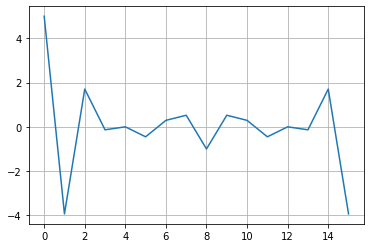

In [ ]:
#Your code starts here

#manual calculation:
# F(u) = 1/N * [{cos(πu(N-4)) - i*sin(πu(N-4))} + {cos(πu(N-2)) - i*sin(πu(N-2))} + {cos(πuN) - i*sin(πuN)}
#    + {cos(πu(N+2)) - i*sin(πu(N+2))} + {cos(πu(N+4)) - i*sin(πu(N+4))}]

#python code
#let N=16.
signal = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])
f = np.fft.fft(signal)
print(f)
plt.plot(f)
plt.grid()

#Your code should end here

**Spatial Filtering**

(1) Consider using different linear and non-linear filters (at least three) to handle the corrupted image and provide the Python code.

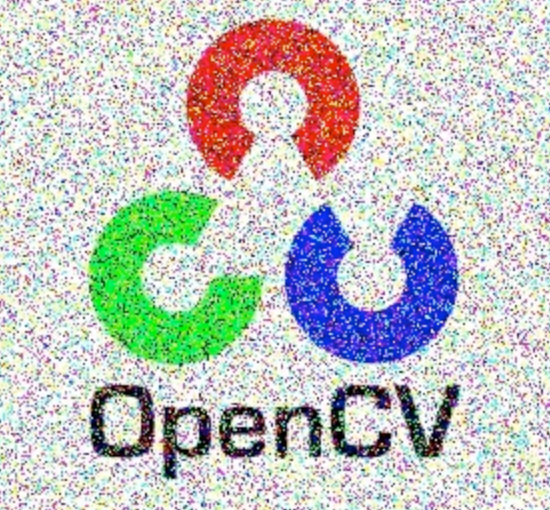

Text(0.5, 1.0, 'Median')

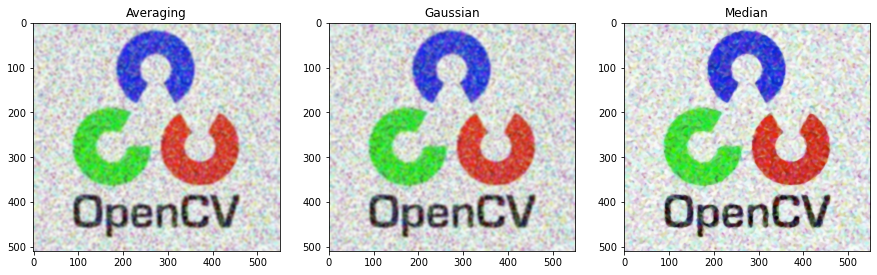

In [ ]:
#Your code starts here

#(1) apply different filters

#read image q2 as a matrix
q4 = cv2.imread("./q4.png")
x,y,c=np.shape(q4)

#apply filters
#averaging
k1 = np.ones((5,5),np.float32)/25
filter1 = cv2.filter2D(q4,-1,k1)
filter1 = cv2.filter2D(filter1,-1,k1)
#gaussian
filter2 = cv2.GaussianBlur(q4,(5,5), 10)
filter2 = cv2.GaussianBlur(filter2,(5,5), 10)
#median
filter3 = cv2.medianBlur(q4, 5)
filter3 = cv2.medianBlur(filter3, 5)


#show images
fig, axes = plt.subplots(1,3, figsize=(15, 5))
#show averaging filter
axes[0].imshow(filter1)
axes[0].set_title("Averaging")
#show gaussian filter
axes[1].imshow(filter2)
axes[1].set_title("Gaussian")
#show median filter
axes[2].imshow(filter3)
axes[2].set_title("Median")

#Your code should end here

Q4. (2) Show the filtered results and make comparison with discussion on different filters.
Explain reasons why some selected filters work while the others do not.

The noises in the Averaging filter are blurred, and are less prominant than the original picture, but the noises are still clearly visible. This is since averaging simply changes the centre element by the average of all the 9 values in the kernel, the centre values are highly influenced by the noise values. The edges are the most blurred in Averaging filter.

Although Gaussian filter is different than Averaging filter such that it uses the weighted average. However, the result from the Gaussian filter is not that different from the Averaging filter, because the weight of the noises are not smaller than the other elements. It merely weighs the elements in the middle higher, and the elements in the middle might or might not be noise values. The edges seem to be less blurred than the Averaging filter.

Median blur is the most effective among the three filters. Averaging and Gaussian takes into account the noise values by averaging or weighted averaging, but the median filter merely replaces the centre element with the median value of the kernel. Since the median value does not take into account the noise values in many cases, it seems to be the most effective filter among averaging, gaussian, and median. The edges are also more defined than the other filters.

**Q5. Filtering in Frequency Domain and the Convolution Theorem**

(1) Complete the function filter_in_frequency_domain that applies a filter to an image in the frequency domain. The function inputs are a grayscale image and a kernel, and the function output is the filtered (floating point) image corresponding to the input image.

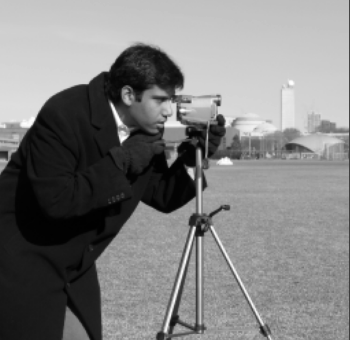

In [ ]:
#Your code starts here
def filter_in_frequency_domain(img, kernel):

    x,y,c=np.shape(img)
    x1,y1= np.shape(kernel)

    #FFT of img
    f = np.fft.fft2(img[:,:,0])
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    #plt.imshow(magnitude_spectrum.astype('uint8'))

    #FFT of kernel
    zero_padded = np.pad(kernel, [(0,x-x1), (0, y-y1)], mode='constant', constant_values=0)
    h = np.fft.fft2(zero_padded)
    hshift = np.fft.fftshift(h)
    magnitude_h = 20 * np.log(np.abs(hshift))
    #plt.imshow(magnitude_h.astype('uint8'))


    #multiplication of img and kernel
    filtered_freq = np.multiply(fshift, hshift)

    #shift the filtered frequency back from centre to uper left corner
    filtered_ishift = np.fft.ifftshift(filtered_freq)

    #iFFT of filtered image in the frequency domain
    filtered_img = np.fft.ifft2(filtered_ishift)

    return filtered_img

#Your code should end here

(2) Complete the function conv_theorem that applies the filter to the image f(x,y) in the frequency and spatial domain. The function takes as input an image and a kernel, and returns the output images filtered in the frequency and spatial domain

In [ ]:
#Your code starts here
def conv_theorem(img, kernel):

    #call filter_in_frequency_domain
    filtered_frequency = filter_in_frequency_domain(img, kernel)

    #apply filter in the spatial domain
    filtered_spatial = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

    filtered_img = [filtered_frequency, filtered_spatial]

    return filtered_img

q5 = np.float32(cv2.imread("./q5.png"))
x,y,c=np.shape(q5)
kernel = np.float32([[1,1,1],[1,-8,1],[1,1,1]])
filtered = conv_theorem(q5, kernel)
#plt.imshow(filtered.astype('uint8'))


#Your code should end here

C:\Users\Sua\AppData\Local\Temp\ipykernel_40228\2197036253.py:17: RuntimeWarning: divide by zero encountered in log
  magnitude_h = 20 * np.log(np.abs(hshift))


(3) Call the function conv_theorem with the Laplacian kernel h(x,y)

C:\Users\Sua\AppData\Local\Temp\ipykernel_40228\2197036253.py:17: RuntimeWarning: divide by zero encountered in log
  magnitude_h = 20 * np.log(np.abs(hshift))
C:\Users\Sua\AppData\Local\Temp\ipykernel_40228\676708200.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  axes[0].imshow(filtered_img[0].astype('uint8'), cmap='gray')
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'filter applied in the spatial domain')

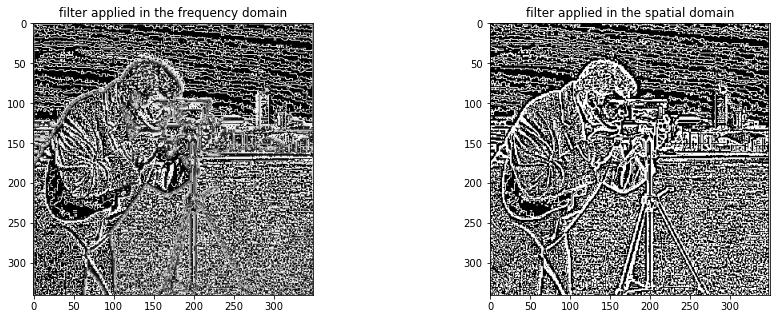

In [ ]:
#Your code starts here
q5 = np.float32(cv2.imread("./q5.png"))
laplacian = np.float32([[1,1,1],[1,-8,1],[1,1,1]])
filtered_img = conv_theorem(q5, laplacian)

#show images
fig, axes = plt.subplots(1,2, figsize=(15, 5))
 #
axes[0].imshow(filtered_img[0].astype('uint8'), cmap='gray')
axes[0].set_title("filter applied in the frequency domain")
axes[1].imshow(filtered_img[1])
axes[1].set_title("filter applied in the spatial domain")

#Your code should end here


(4) Briefly discuss your results. Why would it be beneficial to implement filtering in the frequency domain?

For edge detection, since edges are local features and are properties of the spatial domain, it is in most cases done in the spatial domain. From the above results, higher frequency values are mosre clearly distinguished by the edges with the filter applied in the spatial domain compared to that of the frequency domain.
It is benefitial to apply filters in the frequency domain since it could be computationally faster than applying filters in the spatial domain. However, in this case, since the kernel is of size 3 * 3 and is not that big, it might not make that big of a difference.
